In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(
    debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, 
    order=3, real_params=real_params, robust=False,
    njobs=8, build_P=True
)
Qp, Pp = recon.measured(y, u, plot=True)  #, ij=(1,3))

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.179 Seconds
Building LP ...
	Done. Took 0.190 Seconds
Building M ...
	Done. Took 0.076 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.264
	Done. Took 2.054 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
Learning Convolution for Q(1,3) ...
Learning Convolution for Q(2,1) ...
Learning Convolution for Q(2,3) ...
Learning Convolution for Q(3,1) ...
Learning Convolution for Q(3,2) ...
	Q(3,2): -9.012*(0.856)^t + 8.129*(0.949)^t + -0.161*(0.062)^t + 1.043528 * delta(t,0)
		RMSE = 0.011
		Matlab: [-9.01  0.86  8.13  0.95 -0.16  0.06]
	Done. Took 8.104 Seconds
	Q(3,1): -0.013*(0.403)^t + 7.922*(-0.000)^t + -1.295*(-0.007)^t + -6.614002 * delta(t,0)
		RMSE = 0.001
		Matlab: [-0.01  0.4   7.92 -0.   -1.3  -0.01]
	Done. Took 8.237 Seconds
	Q(1,3): 9.893*(0.058)^t + 0.274*(0.790)^t + -3.129*

In [3]:
Qs, Ps = recon.params2series(Qp, Pp)
yest = recon.simulate(Qs, Ps, u, r=None)

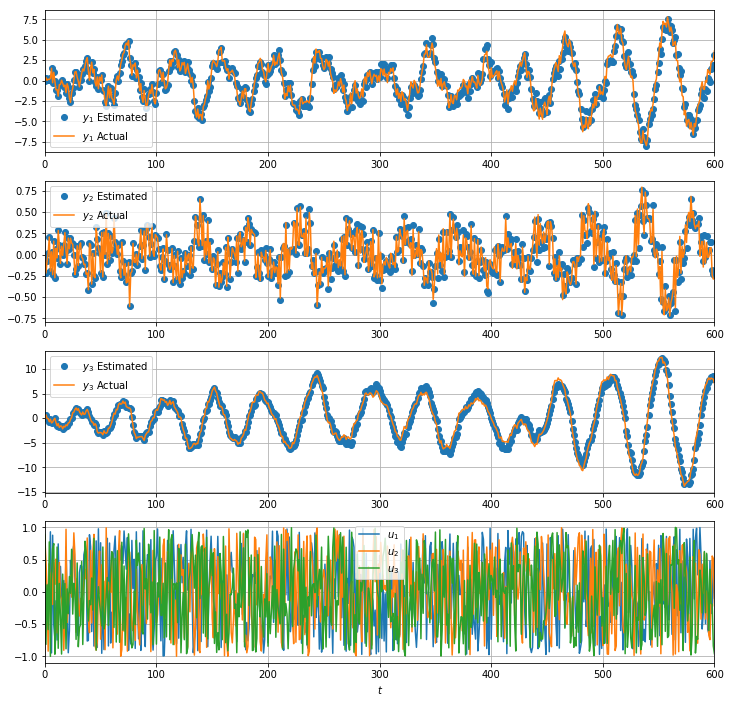

In [4]:
%matplotlib inline 
plt.figure(figsize=(12,12))

ax = plt.subplot(411)
t = np.arange(yest.shape[0])
plt.plot(t, yest[:, 0], 'o', label='$y_1$ Estimated')
plt.plot(t, y[:, 0], label='$y_1$ Actual')
plt.grid()
plt.legend()

ax = plt.subplot(412, sharex=ax)
t = np.arange(yest.shape[0])
plt.plot(t, yest[:, 1], 'o', label='$y_2$ Estimated')
plt.plot(t, y[:, 1], label='$y_2$ Actual')
plt.grid()
plt.legend()

ax = plt.subplot(413, sharex=ax)
t = np.arange(yest.shape[0])
plt.plot(t, yest[:, 2], 'o', label='$y_3$ Estimated')
plt.plot(t, y[:, 2], label='$y_3$ Actual')
plt.grid()
plt.legend()

plt.subplot(414, sharex=ax)
plt.plot(t, u[:, 0], label='$u_1$')
plt.plot(t, u[:, 1], label='$u_2$')
plt.plot(t, u[:, 2], label='$u_3$')

plt.xlabel('$t$')
plt.xlim(0, max(t))
plt.grid()

plt.legend()